In [1]:
from easy_coloc import lib_easy_coloc
import xarray as xr
import pandas as pd
import cartopy as cart
import matplotlib.pylab as plt
from matplotlib import cm
import datetime
import cmocean
import numpy as np

In [2]:
inds = pd.read_csv('../FILTERED_GLODAP_EXPOCODE.csv')
inds['ID']

0        15
1        18
2        19
3        20
4        23
5        45
6        49
7        51
8        68
9        69
10       70
11       71
12       72
13       73
14       74
15       75
16       76
17       77
18       83
19       84
20      162
21      165
22      167
23      168
24      169
25      170
26      171
27      172
28      173
29      174
       ... 
77      680
78      682
79      682
80      695
81      698
82      699
83      700
84     1020
85     1029
86     1035
87     1036
88     1040
89     1041
90     1042
91     1043
92     1044
93     1045
94     1046
95     1047
96     1049
97     1050
98     1051
99     1052
100    1053
101    1054
102    1055
103    1095
104    1100
105    1101
106    1109
Name: ID, Length: 107, dtype: int64

In [3]:
glodap = pd.read_csv('../GLODAPv2.2019_Merged_Master_File.csv')
glodap

cruise  station  cast    year  month   day  hour  minute  latitude  \
0           1.0    319.0   1.0  1984.0    7.0  20.0  14.0    46.0    80.567   
1           1.0    319.0   1.0  1984.0    7.0  20.0  14.0    46.0    80.567   
2           1.0    319.0   1.0  1984.0    7.0  20.0  14.0    46.0    80.567   
3           1.0    319.0   1.0  1984.0    7.0  20.0  14.0    46.0    80.567   
4           1.0    319.0   1.0  1984.0    7.0  20.0  14.0    46.0    80.567   
5           1.0    319.0   1.0  1984.0    7.0  20.0  14.0    46.0    80.567   
6           1.0    319.0   1.0  1984.0    7.0  20.0  14.0    46.0    80.567   
7           1.0    319.0   1.0  1984.0    7.0  20.0  14.0    46.0    80.567   
8           1.0    319.0   1.0  1984.0    7.0  20.0  14.0    46.0    80.567   
9           1.0    319.0   1.0  1984.0    7.0  20.0  14.0    46.0    80.567   
10          1.0    319.0   1.0  1984.0    7.0  20.0  14.0    46.0    80.567   
11          1.0    319.0   1.0  1984.0    7.0  20.0  14.0    46.0    80.567   
12          1.0    319.0   1.0  1984.0    7.0  20.0  14.0    46.0    80.567   
13          1.0    319.0   1.0  1984.0    7.0  20.0  14.0    46.0    80.567   
14          1.0    319.0   1.0  1984.0    7.0  20.0  14.0    46.0    80.567   
15          1.0    319.0   1.0  1984.0    7.0  20.0  14.0    46.0    80.567   
16          1.0    319.0   1.0  1984.0    7.0  20.0  14.0    46.0    80.567   
17          1.0    319.0   1.0  1984.0    7.0  20.0  14.0    46.0    80.567   
18          1.0    319.0   1.0  1984.0    7.0  20.0  14.0    46.0    80.567   
19          1.0    319.0   1.0  1984.0    7.0  20.0  14.0    46.0    80.567   
20          1.0    319.0   1.0  1984.0    7.0  20.0  14.0    46.0    80.567   
21          1.0    319.0   1.0  1984.0    7.0  20.0  14.0    46.0    80.567   
22          1.0    319.0   1.0  1984.0    7.0  20.0  14.0    46.0    80.567   
23          1.0    320.0   1.0  1984.0    7.0  21.0   0.0    35.0    80.633   
24          1.0    320.0   1.0  1984.0    7.0  21.0   0.0    35.0    80.633   
25          1.0    320.0   1.0  1984.0    7.0  21.0   0.0    35.0    80.633   
26          1.0    320.0   1.0  1984.0    7.0  21.0   0.0    35.0    80.633   
27          1.0    320.0   1.0  1984.0    7.0  21.0   0.0    35.0    80.633   
28          1.0    320.0   1.0  1984.0    7.0  21.0   0.0    35.0    80.633   
29          1.0    320.0   1.0  1984.0    7.0  21.0   0.0    35.0    80.633   
...         ...      ...   ...     ...    ...   ...   ...     ...       ...   
1174976  1116.0     24.0   1.0  2007.0    9.0   7.0   0.0     0.0    84.074   
1174977  1116.0     24.0   1.0  2007.0    9.0   7.0   0.0     0.0    84.074   
1174978  1116.0     24.0   1.0  2007.0    9.0   7.0   0.0     0.0    84.074   
1174979  1116.0     24.0   1.0  2007.0    9.0   7.0   0.0     0.0    84.074   
1174980  1116.0     24.0   1.0  2007.0    9.0   7.0   0.0     0.0    84.074   
1174981  1116.0     24.0   1.0  2007.0    9.0   7.0   0.0     0.0    84.074   
1174982  1116.0     25.0   1.0  2007.0    9.0   7.0   0.0     0.0    83.911   
1174983  1116.0     25.0   1.0  2007.0    9.0   7.0   0.0     0.0    83.911   
1174984  1116.0     25.0   1.0  2007.0    9.0   7.0   0.0     0.0    83.911   
1174985  1116.0     25.0   1.0  2007.0    9.0   7.0   0.0     0.0    83.911   
1174986  1116.0     25.0   1.0  2007.0    9.0   7.0   0.0     0.0    83.911   
1174987  1116.0     25.0   1.0  2007.0    9.0   7.0   0.0     0.0    83.911   
1174988  1116.0     25.0   1.0  2007.0    9.0   7.0   0.0     0.0    83.911   
1174989  1116.0     25.0   1.0  2007.0    9.0   7.0   0.0     0.0    83.911   
1174990  1116.0     25.0   1.0  2007.0    9.0   7.0   0.0     0.0    83.911   
1174991  1116.0     25.0   1.0  2007.0    9.0   7.0   0.0     0.0    83.911   
1174992  1116.0     25.0   1.0  2007.0    9.0   7.0   0.0     0.0    83.911   
1174993  1116.0     25.0   1.0  2007.0    9.0   7.0   0.0     0.0    83.911   
1174994  1116.0     25.0   1.0  2007.0    9.0   7.0   0.0  

In [4]:
glodap_filtered = glodap[glodap['cruise'].isin(inds['ID'])]
glodap_filtered

cruise  station  cast    year  month   day  hour  minute  latitude  \
30533      15.0     16.0   1.0  2005.0    1.0  25.0   2.0    15.0 -41.13400   
30534      15.0     16.0   1.0  2005.0    1.0  25.0   2.0    15.0 -41.13400   
30535      15.0     16.0   1.0  2005.0    1.0  25.0   2.0    15.0 -41.13400   
30536      15.0     16.0   1.0  2005.0    1.0  25.0   2.0    15.0 -41.13400   
30537      15.0     16.0   1.0  2005.0    1.0  25.0   2.0    15.0 -41.13400   
30538      15.0     16.0   1.0  2005.0    1.0  25.0   2.0    15.0 -41.13400   
30539      15.0     16.0   1.0  2005.0    1.0  25.0   2.0    15.0 -41.13400   
30540      15.0     16.0   1.0  2005.0    1.0  25.0   2.0    15.0 -41.13400   
30541      15.0     16.0   1.0  2005.0    1.0  25.0   2.0    15.0 -41.13400   
30542      15.0     16.0   1.0  2005.0    1.0  25.0   2.0    15.0 -41.13400   
30543      15.0     16.0   1.0  2005.0    1.0  25.0   2.0    15.0 -41.13400   
30544      15.0     16.0   1.0  2005.0    1.0  25.0   2.0    15.0 -41.13400   
30545      15.0     16.0   1.0  2005.0    1.0  25.0   2.0    15.0 -41.13400   
30546      15.0     16.0   1.0  2005.0    1.0  25.0   2.0    15.0 -41.13400   
30547      15.0     16.0   1.0  2005.0    1.0  25.0   2.0    15.0 -41.13400   
30548      15.0     16.0   1.0  2005.0    1.0  25.0   2.0    15.0 -41.13400   
30549      15.0     16.0   1.0  2005.0    1.0  25.0   2.0    15.0 -41.13400   
30550      15.0     16.0   1.0  2005.0    1.0  25.0   2.0    15.0 -41.13400   
30551      15.0     16.0   1.0  2005.0    1.0  25.0   2.0    15.0 -41.13400   
30552      15.0     16.0   1.0  2005.0    1.0  25.0   2.0    15.0 -41.13400   
30553      15.0     16.0   1.0  2005.0    1.0  25.0   2.0    15.0 -41.13400   
30554      15.0     16.0   1.0  2005.0    1.0  25.0   2.0    15.0 -41.13400   
30555      15.0     16.0   1.0  2005.0    1.0  25.0   2.0    15.0 -41.13400   
30556      15.0     16.0   1.0  2005.0    1.0  25.0   2.0    15.0 -41.13400   
30557      15.0     21.0   1.0  2005.0    1.0  28.0  18.0     7.0 -47.66600   
30558      15.0     21.0   1.0  2005.0    1.0  28.0  18.0     7.0 -47.66600   
30559      15.0     21.0   1.0  2005.0    1.0  28.0  18.0     7.0 -47.66600   
30560      15.0     21.0   1.0  2005.0    1.0  28.0  18.0     7.0 -47.66600   
30561      15.0     21.0   1.0  2005.0    1.0  28.0  18.0     7.0 -47.66600   
30562      15.0     21.0   1.0  2005.0    1.0  28.0  18.0     7.0 -47.66600   
...         ...      ...   ...     ...    ...   ...   ...     ...       ...   
1170291  1109.0    143.0   1.0  2016.0    1.0  20.0  17.0    58.0  27.86528   
1170292  1109.0    143.0   1.0  2016.0    1.0  20.0  17.0    58.0  27.86528   
1170293  1109.0    143.0   1.0  2016.0    1.0  20.0  17.0    58.0  27.86528   
1170294  1109.0    143.0   1.0  2016.0    1.0  20.0  17.0    58.0  27.86528   
1170295  1109.0    143.0   1.0  2016.0    1.0  20.0  17.0    58.0  27.86528   
1170296  1109.0    143.0   1.0  2016.0    1.0  20.0  17.0    58.0  27.86528   
1170297  1109.0    143.0   1.0  2016.0    1.0  20.0  17.0    58.0  27.86528   
1170298  1109.0    143.0   1.0  2016.0    1.0  20.0  17.0    58.0  27.86528   
1170299  1109.0    143.0   1.0  2016.0    1.0  20.0  17.0    58.0  27.86528   
1170300  1109.0    143.0   1.0  2016.0    1.0  20.0  17.0    58.0  27.86528   
1170301  1109.0    143.0   1.0  2016.0    1.0  20.0  17.0    58.0  27.86528   
1170302  1109.0    143.0   1.0  2016.0    1.0  20.0  17.0    58.0  27.86528   
1170303  1109.0    144.0   1.0  2016.0    1.0  20.0  20.0     5.0  27.91334   
1170304  1109.0    144.0   1.0  2016.0    1.0  20.0  20.0     5.0  27.91334   
1170305  1109.0    144.0   1.0  2016.0    1.0  20.0  20.0     5.0  27.91334   
1170306  1109.0    144.0   1.0  2016.0    1.0  20.0  20.0     5.0  27.91334   
1170307  1109.0    144.0   1.0  2016.0    1.0  20.0  20.0     5.0  27.91334   
1170308  1109.0    144.0   1.0  2016.0    1.0  20.0  20.0     5.0  27.91334   
1170309  1109.0    144.0   1.0  2016.0    1.0  20.0  20.0  

/home/sridge/.conda/envs/analysis/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


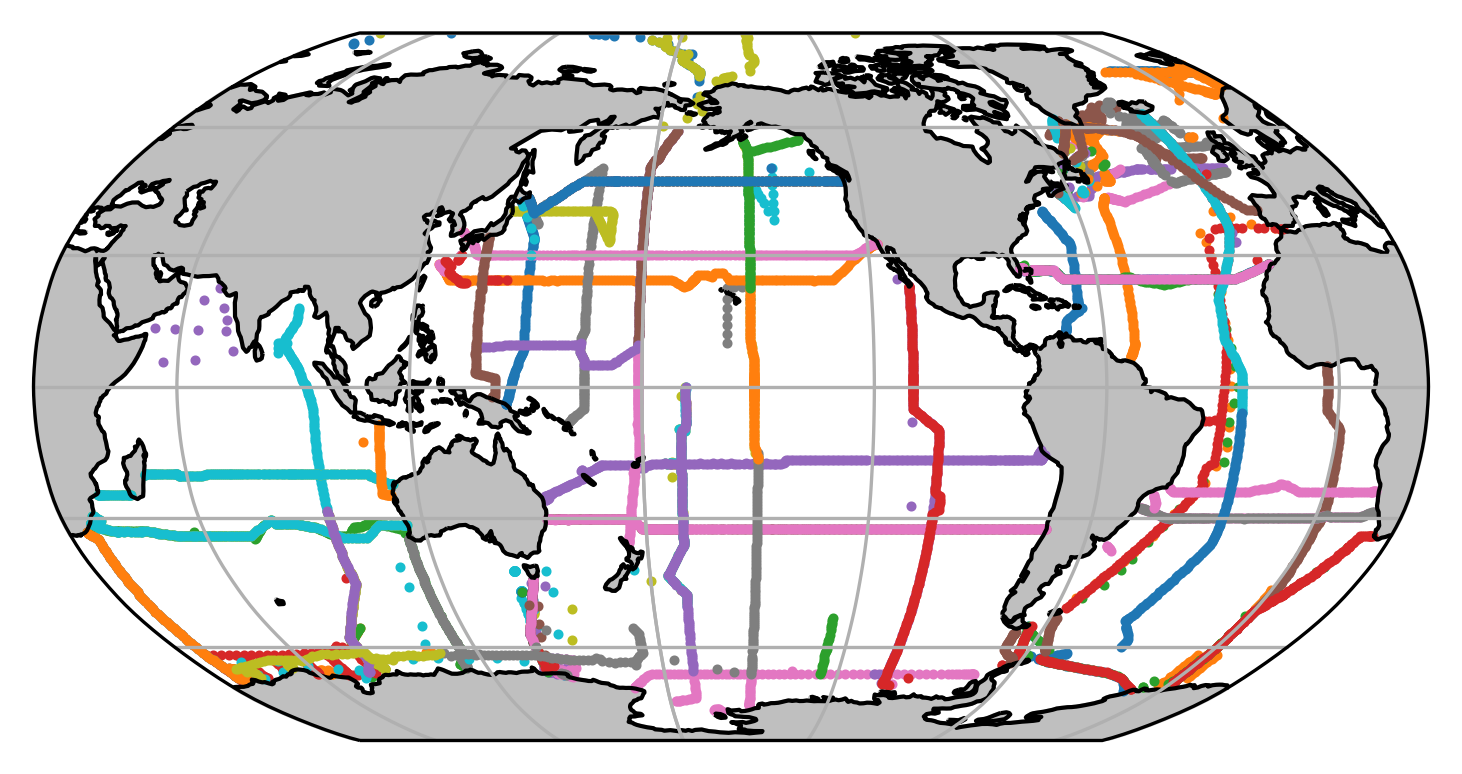

In [5]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(1, 1, 1, projection=cart.crs.Robinson(central_longitude=203))

# make the map global rather than have it zoom in to
# the extents of any plotted data
ax.set_global()

for cruise in inds['ID']:

    cruise = glodap_filtered[glodap['cruise']==cruise]
    lat = cruise.groupby('station').mean()['latitude']
    lon = cruise.groupby('station').mean()['longitude']
    
    C = ax.scatter(lon,lat, transform=cart.crs.PlateCarree(),s=2)

ax.add_feature(cart.feature.LAND, facecolor='0.75')
ax.coastlines()
gl = ax.gridlines()
plt.savefig('sections_no_qc.png')

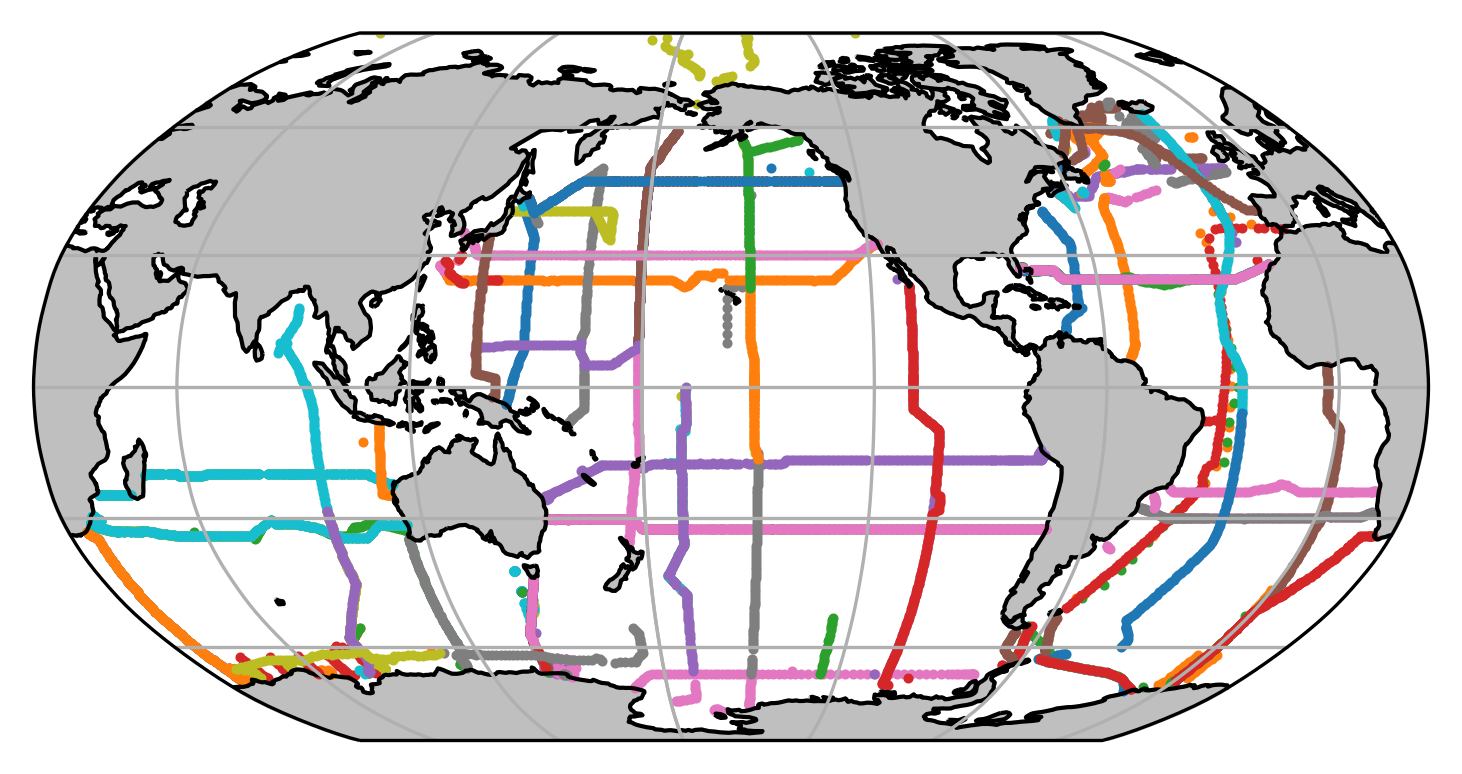

In [6]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(1, 1, 1, projection=cart.crs.Robinson(central_longitude=203))

# make the map global rather than have it zoom in to
# the extents of any plotted data
ax.set_global()

coords = pd.read_csv('../GLODAPv2.2019_COORDS.csv')

for cruise in inds['ID']:

    cruise = coords[coords['cruise']==cruise]
    lat = cruise['latitude']
    lon = cruise['longitude']
    
    C = ax.scatter(lon,lat, transform=cart.crs.PlateCarree(),s=2)

ax.add_feature(cart.feature.LAND, facecolor='0.75')
ax.coastlines()
gl = ax.gridlines()
plt.savefig('sections_qc.png')

In [7]:
for cruise_i,line in zip(inds['ID'],inds['LINE']):
                       
    cruise = glodap_filtered[glodap['cruise']==cruise_i]
    lat = cruise.groupby('station').mean()['latitude']
    lon = cruise.groupby('station').mean()['longitude']
    year = int(cruise.groupby('cruise').mean()['year'].values[0])
                       
    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(1, 1, 1, projection=cart.crs.PlateCarree())

    ax.set_title(line)

    C = ax.scatter(lon,lat, transform=cart.crs.PlateCarree(),s=2)

    ax.add_feature(cart.feature.LAND, facecolor='0.75')
    ax.coastlines()
    gl = ax.gridlines()
    
    if '/' in line:
        line=line.replace('/','_')

    plt.savefig(f'{line}_{year}_no_qc.png')
    plt.close(fig)

/home/sridge/.conda/envs/analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
coords = pd.read_csv('../GLODAPv2.2019_COORDS.csv')

for cruise_i,line in zip(inds['ID'],inds['LINE']):
                       
    cruise = coords[coords['cruise']==cruise_i]
    
    if len(cruise) != 0:
    
        lat = cruise['latitude']
        lon = cruise['longitude']
        
        year = int(cruise['year'].values[0])
    
        fig = plt.figure(dpi=300)
        ax = fig.add_subplot(1, 1, 1, projection=cart.crs.PlateCarree())

        ax.set_title(line)

        C = ax.scatter(lon,lat, transform=cart.crs.PlateCarree(),s=2)

        ax.add_feature(cart.feature.LAND, facecolor='0.75')
        ax.coastlines()
        gl = ax.gridlines()

        if '/' in line:
            line=line.replace('/','_')

        plt.savefig(f'{line}_{year}_qc.png')
        plt.close(fig)